In [63]:
import pandas as pd
# We will be using cosine similarity to compute similarity. We use cosine similarity
# score because it is  independent of magnitude and is also relatively easy and fast to calculate.
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])

In [64]:
# Reading raw artists dataset
artists = pd.read_csv('../data/spotify_artists.csv')
artists.head()

,artist_uri,artist_name,popularity,followers,genres
0,spotify:artist:7urq0VfqxEYEEiZUkebXT4,112,65,1003390,atl hip hop; boy band; contemporary r&b; dance...
1,spotify:artist:3DmG65yHQsMms7WAvrZOdt,Enigma,62,715293,downtempo; new age
2,spotify:artist:3zTOe1BtyTkwNvYZOxXktX,Joe,65,1586163,contemporary r&b; dance pop; hip pop; neo soul...
3,spotify:artist:2HMuzFmTtwL4ur1zJNCU7f,Arcadia,31,26421,new romantic; new wave; new wave pop; synthpop
4,spotify:artist:41Q0HrwWBtuUkJc7C1Rp6K,311,61,880585,alternative metal; alternative rock; funk meta...


In [65]:
artists.shape

(1776, 5)

In [66]:
# Reading the cluster results for each of the main clusters identified by our isomap
cluster_1 = pd.read_csv('../data/clusters/uri_map_1st_cluster.csv')
artist_cluster_1 = cluster_1.name.values
cluster_2 = pd.read_csv('../data/clusters/uri_map_2nd_cluster.csv')
artist_cluster_2 = cluster_2.name.values
cluster_3 = pd.read_csv('../data/clusters/uri_map_3rd_cluster.csv')
artist_cluster_3 = cluster_3.name.values

In [67]:
# artists[artists['artist_name'].isin(artist_cluster_1)]

Let's find simmilar artists within clusters based on their **genres**

In [68]:
# We created this function to estimate cosine simmilarity using 
def get_recommendations(df, idx, cosine_sm):

    # get the sim score of all artists in the cluster with the artist of index idx
    sim_scores = list(enumerate(cosine_sm[idx]))

    # sort based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse =True)
    # print(len(sim_scores))
    
    # get top 20 most similar artists
    sim_scores_top = sim_scores[1:21]

    # get their indices
    top_indices = [i[0] for i in sim_scores_top]

    # return top games
    return df['artist_name'].iloc[top_indices]

In [77]:
# genres = artist_filtered['genres']
# text = " ".join([str(item) for item in genres])
# text

In [78]:
def filter_recommend ( filter_by, artists = artists,col_name='artist_name'):
    artist_filtered = artists[artists[col_name].isin(filter_by)].reset_index(drop=True)
    genres = artist_filtered['genres']
    # genres
     # Run wordclouds
    text = " ".join([str(item) for item in genres])
    wordcloud = WordCloud(stopwords=stopwords).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show() 

    # Preprocessing
    vec = TfidfVectorizer(stop_words="english", ngram_range=(1,3))
    vec.fit(genres.values)
    features = vec.transform(genres.values)
    print(features.shape[0], "artists described over", features.shape[1], "words")
   
    # Estimate similarity
    # We are going to use sklearn's linear_kernel() instead of cosine_similarities() as it is faster.
    cosine_sm = linear_kernel(features, features)
    indices = pd.Series(artist_filtered.index, index=artist_filtered[col_name]).drop_duplicates()
    # indices
    recommended_list = []
    for indx in indices:
        recommended = get_recommendations(artist_filtered, indx, cosine_sm=cosine_sm)
        recommended_list.append([artist_filtered[col_name].iloc[indx], (recommended).tolist()])
    df = pd.DataFrame(recommended_list, columns=['selected_artist', 'recommended_artist'])
    df['cluster'] = 1
    return df

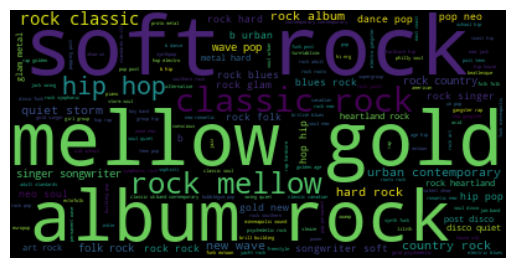

395 artists described over 1408 words


In [79]:
df1 = filter_recommend(artist_cluster_1)

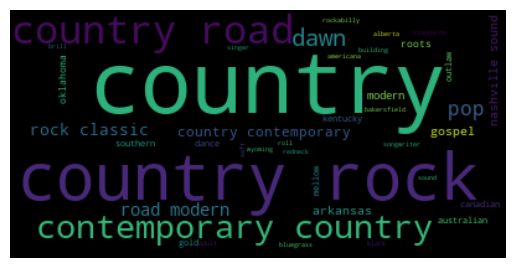

98 artists described over 181 words


In [80]:
df2 = filter_recommend(artist_cluster_2)

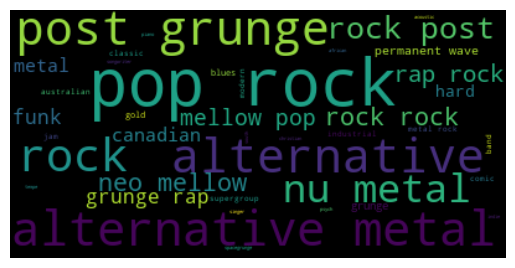

69 artists described over 263 words


In [81]:
df3 = filter_recommend(artist_cluster_3)

In [83]:
df_all =pd.concat([df1, df2, df3], ignore_index=True)

In [84]:
df_all.head()

,selected_artist,recommended_artist,cluster
0,Joe,"[Mýa, Aaliyah, Brandy, Toni Braxton, Amerie, M...",1
1,Berlin,"[Thompson Twins, Howard Jones, Corey Hart, Mr....",1
2,702,"[Brownstone, Changing Faces, Xscape, Jaheim, D...",1
3,Blaque,"[3LW, Danity Kane, Janet Jackson, The Pussycat...",1
4,H-Town,"[Shai, Hi-Five, Tevin Campbell, Soul For Real,...",1
